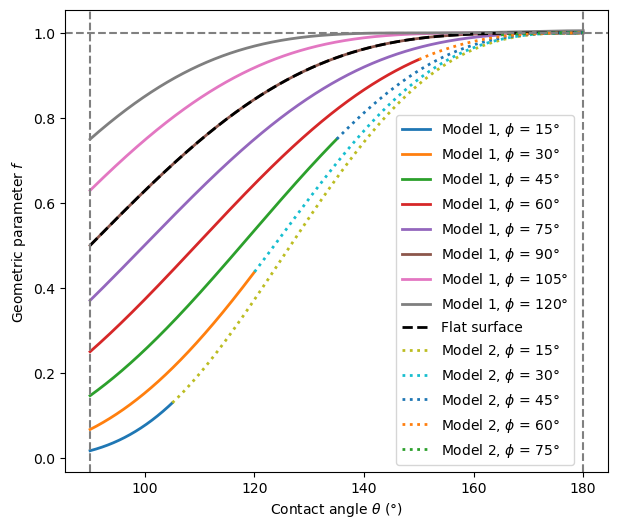

In [31]:
#FigS1
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ----- Function Definitions -----
def free_energy_model1(theta, phi2):
    return 0.5 + 0.25 * (-3 * np.sin(theta + phi2) + np.sin(theta + phi2)**3 - (np.cos(theta + phi2))**3 * np.cos(phi2) / np.sin(phi2))

def free_energy_model2(theta, phi2):
    return 1.0 - np.sin(theta)**3 * np.cos(phi2)

def free_energy_flat(theta):
    return 0.5 + 0.25 * np.cos(theta)**3 - 0.75 * np.cos(theta)

# ----- Setup -----
theta = np.linspace(np.pi * 9 / 18, np.pi, 3140)
theta_deg = np.degrees(theta)
phi2_values_model1 = np.linspace(np.pi * 1.5 / 18, np.pi * 12 / 18, 8)
phi2_values_model2 = np.linspace(np.pi * 1.5 / 18, np.pi * 7.5 / 18, 5)
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# ----- Plotting -----
fig, ax = plt.subplots(figsize=(7, 6))

# Plot Model 1
for phi2 in phi2_values_model1:
    color = next(color_cycle)
    f1 = free_energy_model1(theta, phi2)
    mask = (theta >= np.pi / 2) & (theta <= np.pi / 2 + phi2)
    theta_plot = theta_deg[mask]
    f1_plot = f1[mask]
    plt.plot(theta_plot[:np.argmax(f1_plot) + 1], f1_plot[:np.argmax(f1_plot) + 1],
             color=color, linewidth=2, label=f"Model 1, $\\phi$ = {np.degrees(phi2):.0f}°")

# Plot Flat Surface Reference
plt.plot(theta_deg, free_energy_flat(theta), color='black', linestyle='--', linewidth=2, label='Flat surface')

# Plot Model 2
for phi2 in phi2_values_model2:
    color = next(color_cycle)
    f2 = free_energy_model2(theta, phi2)
    mask = (theta >= np.pi / 2 + phi2) & (theta <= np.pi)
    theta_plot = theta_deg[mask]
    f2_plot = f2[mask]
    plt.plot(theta_plot[:np.argmax(f2_plot) + 1], f2_plot[:np.argmax(f2_plot) + 1],
             linestyle='dotted', linewidth=2, color=color, label=f"Model 2, $\\phi$ = {np.degrees(phi2):.0f}°")

# ----- Formatting -----
plt.xlabel('Contact angle $\\theta$ (°)')
plt.ylabel('Geometric parameter $f$')
plt.axhline(y=1.0, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.axvline(x=180, color='gray', linestyle='--')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.0))
plt.savefig('model1-2-lt.svg')
plt.show()


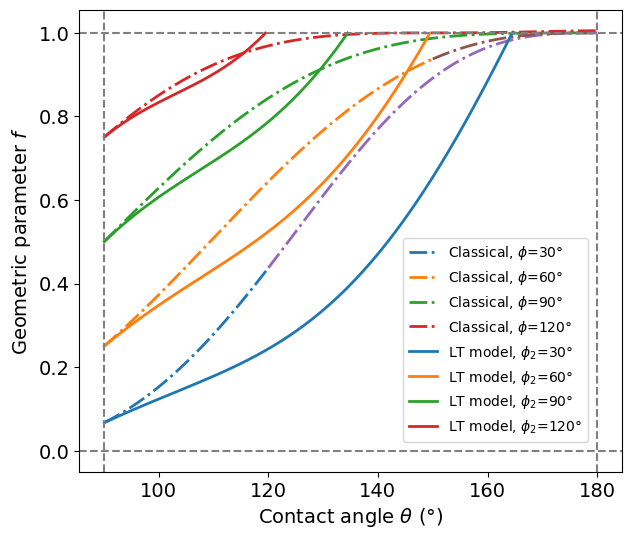

In [18]:
#Fig2a
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ----- Function Definitions -----
def classical_model1(theta, phi2):
    term1 = 0.5
    term2 = 0.25 * (-3 * np.sin(theta + phi2) + np.sin(theta + phi2)**3 - (np.cos(theta + phi2))**3 * np.cos(phi2) / np.sin(phi2))
    return term1 + term2

def classical_model2(theta, phi2):
    return 1.0 - np.sin(theta)**3 * np.cos(phi2)

def flat_surface(theta):
    return 0.5 + 0.25 * np.cos(theta)**3 - 0.75 * np.cos(theta)

def geometric_model_v1(theta, phi2, x1, x2, phi1):
    term1 = 0.25 * (1.0 - np.sin(x1)) * (2 - np.cos(theta) * (1 + np.sin(x1)) / np.sin(phi1))
    term2 = 0.25 * (1.0 - np.sin(x2)) * (2 - np.cos(theta) * (1 + np.sin(x2)) / np.sin(phi2))
    return term1 + term2

def geometric_model_v2(theta, phi2, x1, x2, phi1):
    term1 = (3/4) * (4 - 2 * (np.sin(x1) + np.sin(x2))
             - (np.cos(theta) * ((np.cos(x2))**2 - (np.cos(x1))**2) / np.sin(phi2))
             + 2 * np.cos(x1)**2 / np.sin(phi2) * (np.cos(theta + phi1 + phi2) - np.cos(theta)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + ((np.cos(x2))**3 - (np.cos(x1))**3) / np.tan(phi2))
    return term1 + term2

# ----- Setup -----
theta = np.linspace(np.pi * 9 / 18, np.pi, 3140)
theta_deg = np.degrees(theta)
x10 = np.deg2rad(1)
x20_values_model1 = np.linspace(np.pi * 3 / 18, np.pi * 12 / 18, 4)
x20_values_model2 = np.linspace(np.pi * 3 / 18, np.pi * 6 / 18, 2)
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# ----- Plotting -----
fig, ax = plt.subplots(figsize=(7, 6))

# Classical Model 1
for phi2 in x20_values_model1:
    color = next(colors)
    f1 = classical_model1(theta, phi2)
    mask = (theta >= np.pi/2) & (theta <= np.pi/2 + phi2)
    theta_plot = np.degrees(theta[mask])
    f1_plot = f1[mask]
    max_idx = np.argmax(f1_plot)
    ax.plot(theta_plot[:max_idx + 1], f1_plot[:max_idx + 1], '-.', color=color, linewidth=2,
            label=f"Classical, $\\phi$={np.degrees(phi2):.0f}°")

# Classical Model 2
for phi2 in x20_values_model2:
    color = next(colors)
    f2 = classical_model2(theta, phi2)
    mask = (theta >= np.pi/2 + phi2) & (theta <= np.pi)
    theta_plot = np.degrees(theta[mask])
    f2_plot = f2[mask]
    max_idx = np.argmax(f2_plot)
    ax.plot(theta_plot[:max_idx + 1], f2_plot[:max_idx + 1], '-.', color=color, linewidth=2)

# Geometric Model with Line Tension (V2)
theta = np.linspace(0.001, np.pi, 3140)
theta_deg = np.degrees(theta)
x20_values = np.linspace(np.pi * 3 / 18, np.pi * 12 / 18, 4)
for idx, phi2 in enumerate(x20_values):
    x1_vals = np.pi - theta - x10
    x2_vals = np.pi - theta - phi2
    v2 = geometric_model_v2(theta, phi2, x1_vals, x2_vals, x10)
    mask = (theta >= np.pi * 9 / 18) & (theta <= np.pi - 0.5 * (x10 + phi2))
    theta_plot = theta_deg[mask]
    v2_plot = v2[mask]
    max_idx = np.argmax(v2_plot)
    color = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
    ax.plot(theta_plot[:max_idx + 1], v2_plot[:max_idx + 1], '-', color=color, linewidth=2,
            label=f"LT model, $\\phi_2$={np.degrees(phi2):.0f}°")

# Formatting
ax.set_xlabel('Contact angle $\\theta$ (°)', fontsize=14)
ax.set_ylabel('Geometric parameter $f$', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
for y in [0.0, 1.0]: ax.axhline(y=y, color='gray', linestyle='--')
for x in [90, 180]: ax.axvline(x=x, color='gray', linestyle='--')
ax.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05), fontsize=10)

plt.savefig('model1-2-lt-0+.svg')
plt.show()


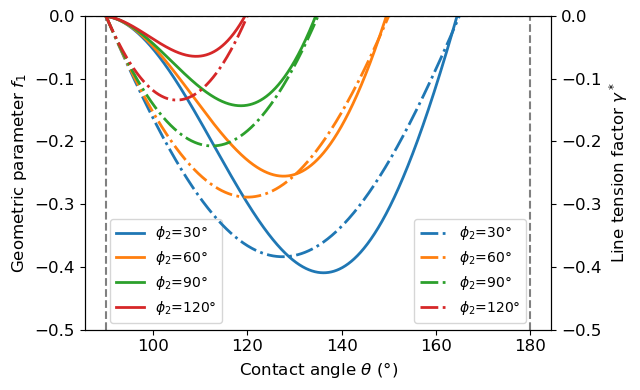

In [17]:
#Fig2b
import numpy as np
import matplotlib.pyplot as plt

# ----- Function Definitions -----
def line_tension_factor(theta, phi1, phi2):
    return - (np.cos(theta + phi1) / np.sin(phi2)) * (np.cos(theta + phi1 + phi2) - np.cos(theta))

def free_energy(x, x20, x1, x2, x10):
    return (3/4) * 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x))

# ----- Setup -----
phi1 = 0
x10 = np.deg2rad(1)
phi = np.linspace(0.001, np.pi, 3140)
phi_degrees = np.degrees(phi)
x20_values = np.linspace(np.pi * 3 / 18, np.pi * 12 / 18, 4)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# ----- Plotting -----
fig, ax1 = plt.subplots(figsize=(6.5, 4))

# Plot free energy (f1) on left y-axis
for idx, x20 in enumerate(x20_values):
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20
    f_energy = free_energy(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi * 9 / 18) & (phi <= np.pi - 0.5 * x20)

    phi_plot = phi_degrees[mask]
    f_energy_plot = f_energy[mask]
    max_idx = np.argmax(f_energy_plot)
    label = f"$\\phi_2$={np.degrees(x20):.0f}°"
    
    ax1.plot(phi_plot[:max_idx + 1], f_energy_plot[:max_idx + 1], '-', linewidth=2, label=label, color=colors[idx])

ax1.set_xlabel('Contact angle $\\theta$ (°)', fontsize=12)
ax1.set_ylabel('Geometric parameter $f_1$', fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
for y in [0.0, 1.0]: ax1.axhline(y=y, color='gray', linestyle='--')
for x in [90, 180]: ax1.axvline(x=x, color='gray', linestyle='--')

# Plot line tension factor on right y-axis
ax2 = ax1.twinx()
for phi2_deg in range(30, 122, 30):
    phi2 = np.deg2rad(phi2_deg)
    theta_deg = np.linspace(90, 180 - 0.5 * phi2_deg, 500)
    theta_rad = np.deg2rad(theta_deg)
    gamma_star = line_tension_factor(theta_rad, phi1, phi2)
    
    ax2.plot(theta_deg, gamma_star, '-.', linewidth=2, label=f"$\\phi_2$={phi2_deg}°")

ax2.set_ylabel('Line tension factor $\\gamma^*$', fontsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.axhline(y=0.0, color='gray', linestyle='--')

# Legends and layout
ax1.legend(loc='lower left', bbox_to_anchor=(0.04, 0.0), fontsize=10)
ax2.legend(loc='lower right', bbox_to_anchor=(0.96, 0.0), fontsize=10)
ax1.set_ylim(-0.5, 0.0)
ax2.set_ylim(-0.5, 0.0)
plt.tight_layout()
plt.savefig('model1-2-lt-0-2.svg')
plt.show()


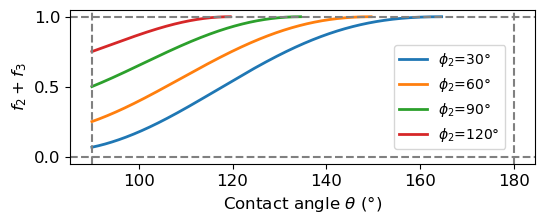

In [16]:
#Fig2c
import numpy as np
import matplotlib.pyplot as plt

# Flat surface free energy model
def free_energy_flat(x):
    return 0.5 + 0.25 * np.cos(x)**3 - 0.75 * np.cos(x)

# Generalized free energy model (Version 1)
def free_energy_v1(x, x20, x1, x2, x10):
    term1 = 0.25 * (1 - np.sin(x1)) * (2 - np.cos(x) * (1 + np.sin(x1)) / np.sin(x10))
    term2 = 0.25 * (1 - np.sin(x2)) * (2 - np.cos(x) * (1 + np.sin(x2)) / np.sin(x20))
    return term1 + term2

# Generalized free energy model (Version 2)
def free_energy_v2(x, x20, x1, x2, x10):
    term2 = (3/4) * (4 - 2 * (np.sin(x1) + np.sin(x2))
             - np.cos(x) * (np.cos(x2)**2 - np.cos(x1)**2) / np.sin(x20))
    term3 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + (np.cos(x2)**3 - np.cos(x1)**3) / np.tan(x20))
    return term2 + term3

# Setup
phi = np.linspace(0.001, np.pi, 3140)
phi_degrees = np.degrees(phi)
x10 = np.deg2rad(1)
x20_values = np.linspace(np.pi * 3 / 18, np.pi * 12 / 18, 4)

fig, ax = plt.subplots(figsize=(6, 2))

# Plot free energy (Version 2) for various φ2
for idx, x20 in enumerate(x20_values):
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20
    energy = free_energy_v2(phi, x20, x1_vals, x2_vals, x10)

    mask = (phi >= np.pi * 9 / 18) & (phi <= np.pi)
    phi_f = phi_degrees[mask]
    energy_f = energy[mask]
    max_idx = np.argmax(energy_f)

    label = f"$\\phi_2$={np.degrees(x20):.0f}°"
    ax.plot(phi_f[:max_idx + 1], energy_f[:max_idx + 1], '-', label=label, linewidth=2)

# Formatting
ax.set_xlabel('Contact angle $\\theta$ (°)', fontsize=12)
ax.set_ylabel('$f_2 + f_3$', fontsize=12)
ax.tick_params(axis='both', labelsize=12)

for y in [0.0, 1.0]: ax.axhline(y=y, color='gray', linestyle='--')
for x in [90, 180]: ax.axvline(x=x, color='gray', linestyle='--')

ax.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05))
plt.savefig('model1-2-lt-0-3.svg')
plt.show()


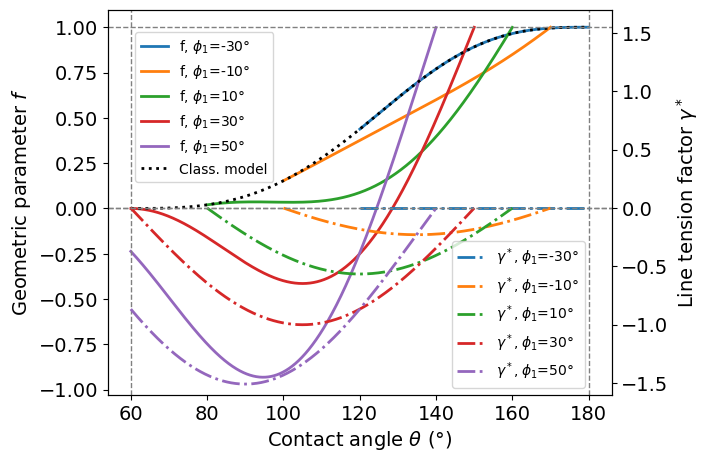

In [15]:
#Fig3a
import numpy as np
import matplotlib.pyplot as plt

# Define the curve for gamma*
def gamma_star(theta, phi1, phi2):
    return - (np.cos(theta + phi1) / np.sin(phi2)) * (np.cos(theta + phi1 + phi2) - np.cos(theta))

# Generalized free energy model
def free_energy_general(x, x20, x1, x2, x10):
    term1 = (3/4) * (4 - 2 * (np.sin(x1) + np.sin(x2))
             - (np.cos(x) * (np.cos(x2)**2 - np.cos(x1)**2) / np.sin(x20))
             + 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + (np.cos(x2)**3 - np.cos(x1)**3) / np.tan(x20))
    return term1 + term2

# Classical free energy model (piecewise)
def free_energy_classical(x, x20):
    return np.piecewise(
        x,
        [x < np.pi / 2 + x20, x >= np.pi / 2 + x20],
        [lambda x: 0.5 + 0.25 * (-3 * np.sin(x + x20) + np.sin(x + x20)**3 - np.cos(x + x20)**3 * np.cos(x20) / np.sin(x20)),
         lambda x: 1.0 - np.sin(x)**3 * np.cos(x20)]
    )

# Setup
phi = np.linspace(np.deg2rad(60), np.pi, 3140)
phi_degrees = np.degrees(phi)
x20 = np.deg2rad(30)
phi2 = x20
x10_values = np.linspace(-np.pi * 3 / 18, np.pi * 5 / 18, 5)

fig, ax1 = plt.subplots(figsize=(6.5, 5))

# Plot free energy (generalized)
for x10 in x10_values:
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20
    energy = free_energy_general(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi * 9 / 18 - x10) & (phi <= np.pi - 0.5 * (x10 + x20))
    phi_f, energy_f = phi_degrees[mask], energy[mask]
    max_idx = np.argmax(energy_f)
    label = f"$\\phi_1$={np.degrees(x10):.0f}°"
    ax1.plot(phi_f[:max_idx + 1], energy_f[:max_idx + 1], '-', label=f"f, {label}", linewidth=2)

# Plot classical free energy
ax1.plot(phi_degrees, free_energy_classical(phi, x20), label='Class. model', color='black', linestyle='dotted', linewidth=2)

# Ax1 settings (left y-axis)
ax1.set_xlabel('Contact angle $\\theta$ (°)', fontsize=14)
ax1.set_ylabel('Geometric parameter $f$', fontsize=14)
ax1.tick_params(axis='both', labelsize=14)
for y in [0.0, 1.0]: ax1.axhline(y=y, color='gray', linestyle='--', linewidth=1)
for x in [60, 180]: ax1.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Plot gamma* on ax2
ax2 = ax1.twinx()
for phi1_deg in range(-30, 52, 20):
    phi1 = np.deg2rad(phi1_deg)
    theta_min = max(60, np.rad2deg(np.pi / 2 - phi1))
    theta_max = np.rad2deg(np.pi / 2 + 0.5 * (5 * np.pi / 6 - phi1))
    theta_deg = np.linspace(theta_min, theta_max, 500)
    ax2.plot(theta_deg, gamma_star(np.deg2rad(theta_deg), phi1, phi2), '-.', label=f"$\\gamma^*, \\phi_1$={phi1_deg}°", linewidth=2)

# Ax2 settings (right y-axis)
ax2.set_ylabel('Line tension factor $\\gamma^*$', fontsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.axhline(y=0.0, color='gray', linestyle='--', linewidth=1)

# Legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.04, 0.96),ncol=1,fontsize=10)
ax2.legend(loc='lower right', bbox_to_anchor=(0.96, 0.0),ncol=1,fontsize=10)

ax2.set_ylim(-1.6, 1.7)
plt.savefig('combined_f_gamma_plot-30.svg')
plt.show()


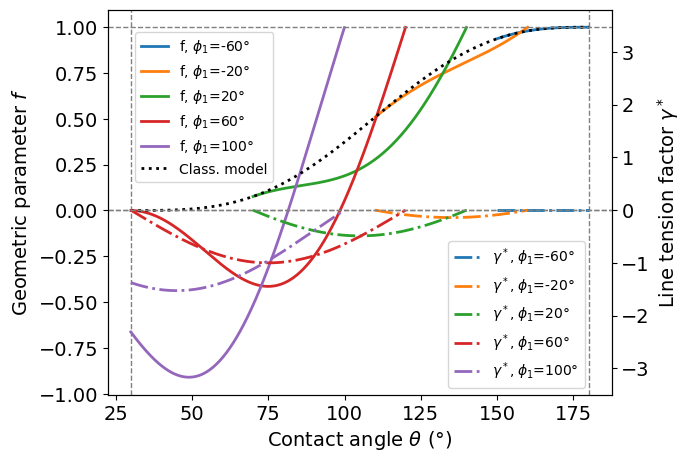

In [14]:
#Fig3b
import numpy as np
import matplotlib.pyplot as plt

# Define the curve for gamma*
def gamma_star(theta, phi1, phi2):
    return - (np.cos(theta + phi1) / np.sin(phi2)) * (np.cos(theta + phi1 + phi2) - np.cos(theta))

# Generalized free energy model
def free_energy_general(x, x20, x1, x2, x10):
    term1 = (3/4) * (4 - 2 * (np.sin(x1) + np.sin(x2))
             - (np.cos(x) * (np.cos(x2)**2 - np.cos(x1)**2) / np.sin(x20))
             + 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + (np.cos(x2)**3 - np.cos(x1)**3) / np.tan(x20))
    return term1 + term2

# Classical free energy model: piecewise form
def free_energy_classical(x, x20):
    return np.piecewise(
        x,
        [x < np.pi / 2 + x20, x >= np.pi / 2 + x20],
        [lambda x: 0.5 + 0.25 * (-3 * np.sin(x + x20) + np.sin(x + x20)**3 - np.cos(x + x20)**3 * np.cos(x20) / np.sin(x20)),
         lambda x: 1.0 - np.sin(x)**3 * np.cos(x20)]
    )

# Setup
phi = np.linspace(np.deg2rad(30), np.pi, 3140)
phi_degrees = np.degrees(phi)
x20 = np.deg2rad(60)
phi2 = x20
x10_values = np.linspace(-np.pi * 6 / 18, np.pi * 10 / 18, 5)

fig, ax1 = plt.subplots(figsize=(6.5, 5))

# Plot free energy (generalized)
for x10 in x10_values:
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20
    energy = free_energy_general(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi * 9 / 18 - x10) & (phi <= np.pi - 0.5 * (x10 + x20))
    phi_f, energy_f = phi_degrees[mask], energy[mask]
    max_idx = np.argmax(energy_f)
    label = f"$\\phi_1$={np.degrees(x10):.0f}°"
    ax1.plot(phi_f[:max_idx + 1], energy_f[:max_idx + 1], '-', label=f"f, {label}", linewidth=2)

# Plot classical free energy
ax1.plot(phi_degrees, free_energy_classical(phi, x20), label='Class. model', color='black', linestyle='dotted', linewidth=2)

# Ax1 settings (left y-axis)
ax1.set_xlabel('Contact angle $\\theta$ (°)', fontsize=14)
ax1.set_ylabel('Geometric parameter $f$', fontsize=14)
ax1.tick_params(axis='both', labelsize=14)
for y in [0.0, 1.0]: ax1.axhline(y=y, color='gray', linestyle='--', linewidth=1)
for x in [30, 180]: ax1.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Plot gamma* on ax2
ax2 = ax1.twinx()
for phi1_deg in range(-60, 102, 40):
    phi1 = np.deg2rad(phi1_deg)
    theta_min = max(30, np.rad2deg(np.pi / 2 - phi1))
    theta_max = np.rad2deg(np.pi / 2 + 0.5 * (2 * np.pi / 3 - phi1))
    theta_deg = np.linspace(theta_min, theta_max, 500)
    ax2.plot(theta_deg, gamma_star(np.deg2rad(theta_deg), phi1, phi2), '-.', label=f"$\\gamma^*, \\phi_1$={phi1_deg}°", linewidth=2)

# Ax2 settings (right y-axis)
ax2.set_ylabel('Line tension factor $\\gamma^*$', fontsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.axhline(y=0.0, color='gray', linestyle='--', linewidth=1)

# Legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.04, 0.96),ncol=1, fontsize=10)
ax2.legend(loc='lower right', bbox_to_anchor=(0.96, 0.0),ncol=1, fontsize=10)

ax2.set_ylim(-3.5, 3.8)
plt.savefig('combined_f_gamma_plot-60.svg')
plt.show()



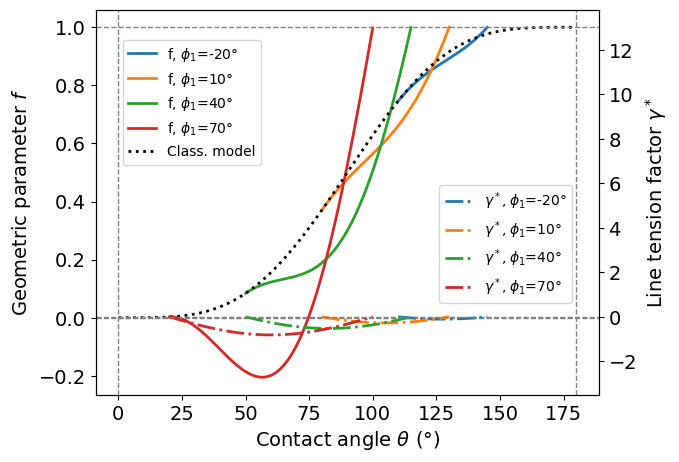

In [13]:
#Fig3c
import numpy as np
import matplotlib.pyplot as plt

# Geometric curve for gamma*
def gamma_star(theta, phi1, phi2):
    return - (np.cos(theta + phi1) / np.sin(phi2)) * (np.cos(theta + phi1 + phi2) - np.cos(theta))

# Free energy model (generalized)
def free_energy_general(x, x20, x1, x2, x10):
    term1 = (3/4) * (4 - 2 * (np.sin(x1) + np.sin(x2))
             - (np.cos(x) * (np.cos(x2)**2 - np.cos(x1)**2) / np.sin(x20))
             + 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + (np.cos(x2)**3 - np.cos(x1)**3) / np.tan(x20))
    return term1 + term2

# Classical free energy model: piecewise
def free_energy_classical(x, x20):
    return np.piecewise(
        x,
        [x < np.pi / 2 + x20, x >= np.pi / 2 + x20],
        [lambda x: 0.5 + 0.25 * (-3 * np.sin(x + x20) + np.sin(x + x20)**3 - np.cos(x + x20)**3 * np.cos(x20) / np.sin(x20)),
         lambda x: 1.0 - np.sin(x)**3 * np.cos(x20)]
    )

# Setup
phi = np.linspace(0, np.pi, 3140)
phi_degrees = np.degrees(phi)
x20 = np.pi / 2  # 90 degrees
phi2 = x20
x10_values = np.linspace(-2*np.pi/18, 7*np.pi/18, 4)

fig, ax1 = plt.subplots(figsize=(6.5, 5))

# Plot free energy (generalized)
for x10 in x10_values:
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20
    energy = free_energy_general(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi * 9 / 18 - x10) & (phi <= np.pi - 0.5 * (x10 + x20))
    phi_f, energy_f = phi_degrees[mask], energy[mask]
    max_idx = np.argmax(energy_f)
    label = f"$\\phi_1$={np.degrees(x10):.0f}°"
    ax1.plot(phi_f[:max_idx + 1], energy_f[:max_idx + 1], '-', label=f"f, {label}", linewidth=2)

# Plot classical free energy
ax1.plot(phi_degrees, free_energy_classical(phi, x20), label='Class. model', color='black', linestyle='dotted', linewidth=2)

# Ax1 settings (left y-axis)
ax1.set_xlabel('Contact angle $\\theta$ (°)', fontsize=14)
ax1.set_ylabel('Geometric parameter $f$', fontsize=14)
ax1.tick_params(axis='both', labelsize=14)
for y in [0.0, 1.0]: ax1.axhline(y=y, color='gray', linestyle='--', linewidth=1)
for x in [0, 180]: ax1.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Plot gamma* on ax2
ax2 = ax1.twinx()
for phi1_deg in range(-20, 72, 30):
    phi1 = np.deg2rad(phi1_deg)
    theta_min = max(0, np.rad2deg(np.pi / 2 - phi1))
    theta_max = np.rad2deg(np.pi / 2 + 0.5 * (np.pi / 2 - phi1))
    theta_deg = np.linspace(theta_min, theta_max, 500)
    ax2.plot(theta_deg, gamma_star(np.deg2rad(theta_deg), phi1, phi2), '-.', label=f"$\\gamma^*, \\phi_1$={phi1_deg}°", linewidth=2)

# Ax2 settings (right y-axis)
ax2.set_ylabel('Line tension factor $\\gamma^*$', fontsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.axhline(y=0.0, color='gray', linestyle='--', linewidth=1)

# Legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.04, 0.94),ncol=1, fontsize=10)
ax2.legend(loc='lower right', bbox_to_anchor=(0.96, 0.22),ncol=1, fontsize=10)

ax2.set_ylim(-3.5, 13.8)
plt.savefig('combined_f_gamma_plot-90.svg')
plt.show()


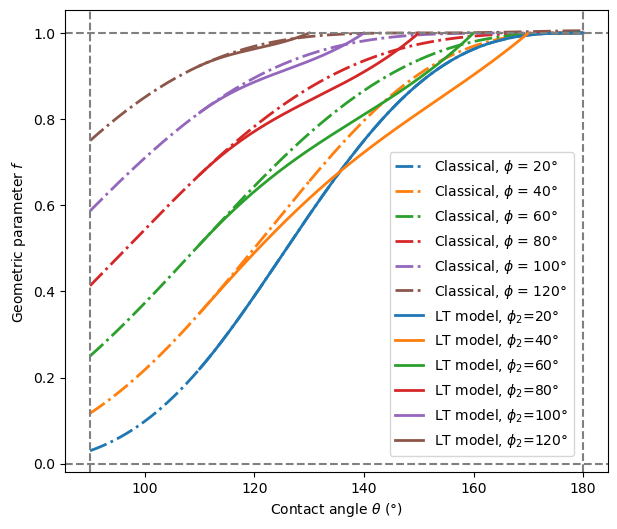

In [26]:
#FigS3a
import numpy as np
import matplotlib.pyplot as plt
import itertools


# Define the first free energy model
def free_energy_model1(x, x20):
    term1 = 0.5
    term2 = 0.25 * (-3 * np.sin(x + x20) + (np.sin(x + x20))**3 - (np.cos(x + x20))**3 * np.cos(x20) / np.sin(x20))
    return term1 + term2

# Define the second free energy model
def free_energy_model2(x, x20):
    term1 = 1.0
    term2 = -np.sin(x)**3 * np.cos(x20)
    return term1 + term2

# Flat surface model (used for both comparisons)
def free_energy_flat(x):
    return 0.5 + 0.25 * np.cos(x)**3 - 0.75 * np.cos(x)

# Angle in radians and degrees
phi = np.linspace(np.pi * 9/18, np.pi, 3140)
phi_degrees = np.degrees(phi)

# Define x20 values for both models
x20_values_model1 = np.linspace(np.pi * 2/18, np.pi * 12/18, 6)
x20_values_model2 = np.linspace(np.pi * 2/18, np.pi * 8/18, 4)

# --- Plotting starts ---
plt.figure(figsize=(7, 6))

# Get default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = itertools.cycle(default_colors)

# Plot model 1
for x20 in x20_values_model1:
    color = next(color_cycle)
    f1 = free_energy_model1(phi, x20)
    mask = (phi >= np.pi/2) & (phi <= np.pi/2 + x20)
    phi_f = phi[mask]
    f1_f = f1[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f1_f)
    plt.plot(phi_f_deg[:max_index+1], f1_f[:max_index+1], color=color, linestyle='-.',
             label=f"Classical, $\\phi$ = {np.degrees(x20):.0f}°", linewidth=2)

# Plot flat surface reference (commented out as in original)
# y_flat = free_energy_flat(phi)
# plt.plot(phi_degrees, y_flat, label='Flat surface', color='black', linestyle='--', linewidth=2)

# Plot model 2
for x20 in x20_values_model2:
    color = next(color_cycle)
    f2 = free_energy_model2(phi, x20)
    mask = (phi >= np.pi/2 + x20) & (phi <= np.pi)
    phi_f = phi[mask]
    f2_f = f2[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f2_f)
    plt.plot(phi_f_deg[:max_index+1], f2_f[:max_index+1], linestyle='-.', linewidth=2)


# Version 1 of free energy function
def free_energy_v1(x, x20, x1, x2, x10):
    term1 = 0.25 * (1.0 - np.sin(x1)) * (2 - np.cos(x) * (1 + np.sin(x1)) / np.sin(x10))
    term2 = 0.25 * (1.0 - np.sin(x2)) * (2 - np.cos(x) * (1 + np.sin(x2)) / np.sin(x20))
    return term1 + term2

# Version 2 of free energy function
def free_energy_v2(x, x20, x1, x2, x10):
    term1 = (3.0 / 4.0) * (4.0 - 2.0 * (np.sin(x1) + np.sin(x2))
             - (np.cos(x) * ((np.cos(x2))**2 - (np.cos(x1))**2) / np.sin(x20))
             + 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + ((np.cos(x2))**3 - (np.cos(x1))**3) / np.tan(x20))
    return term1 + term2

# Setup
phi = np.linspace(0.001, np.pi, 3140)
x10 = -np.pi * 20 / 180  # -30 degrees
x20_values = np.linspace(np.pi * 2 / 18, np.pi * 12 / 18, 6)
phi_degrees = np.degrees(phi)

for idx, x20 in enumerate(x20_values):
    color1 = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20

    # Compute and filter
    v1 = free_energy_v1(phi, x20, x1_vals, x2_vals, x10)
    v2 = free_energy_v2(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi*9 / 18 - x10) & (phi <= np.pi - 0.5 * (x10 + x20))
    
    phi_f = phi_degrees[mask]
    v1_f = v1[mask]
    v2_f = v2[mask]

    max_idx_v1 = np.argmax(v1_f)
    max_idx_v2 = np.argmax(v2_f)

    label_angle = f"$\\phi_2$={np.degrees(x20):.0f}°"
    # plt.plot(phi_f[:max_idx_v1 + 1], v1_f[:max_idx_v1 + 1], label=f"V1 {label_angle}", linewidth=2)
    plt.plot(phi_f[:max_idx_v2 + 1], v2_f[:max_idx_v2 + 1], '-', label=f"LT model, {label_angle}", linewidth=2, color=color1)

# Formatting
plt.xlabel('Contact angle $\\theta$ (°)')
plt.ylabel('Geometric parameter $f$')
plt.axhline(y=1.0, color='gray', linestyle='--')
plt.axhline(y=0.0, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.axvline(x=180, color='gray', linestyle='--')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.02))
plt.savefig('model1-2-lt-minus20.svg')
plt.show()


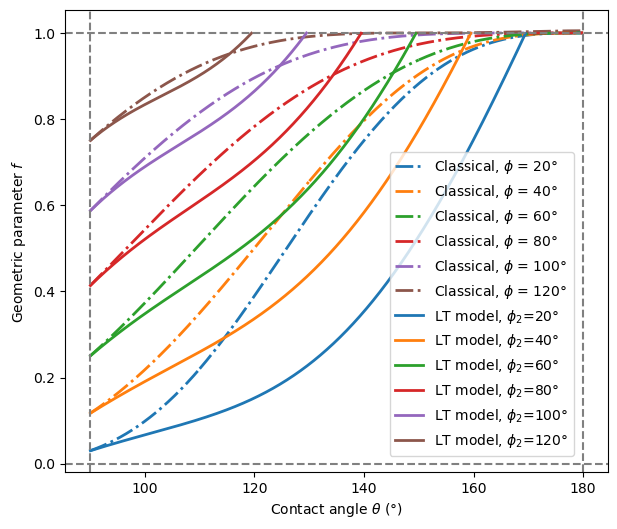

In [27]:
#FigS3b
import numpy as np
import matplotlib.pyplot as plt
import itertools


# Define the first free energy model
def free_energy_model1(x, x20):
    term1 = 0.5
    term2 = 0.25 * (-3 * np.sin(x + x20) + (np.sin(x + x20))**3 - (np.cos(x + x20))**3 * np.cos(x20) / np.sin(x20))
    return term1 + term2

# Define the second free energy model
def free_energy_model2(x, x20):
    term1 = 1.0
    term2 = -np.sin(x)**3 * np.cos(x20)
    return term1 + term2

# Flat surface model (used for both comparisons)
def free_energy_flat(x):
    return 0.5 + 0.25 * np.cos(x)**3 - 0.75 * np.cos(x)

# Angle in radians and degrees
phi = np.linspace(np.pi * 9/18, np.pi, 3140)
phi_degrees = np.degrees(phi)

# Define x20 values for both models
x20_values_model1 = np.linspace(np.pi * 2/18, np.pi * 12/18, 6)
x20_values_model2 = np.linspace(np.pi * 2/18, np.pi * 8/18, 4)

# --- Plotting starts ---
plt.figure(figsize=(7, 6))

# Get default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = itertools.cycle(default_colors)

# Plot model 1
for x20 in x20_values_model1:
    color = next(color_cycle)
    f1 = free_energy_model1(phi, x20)
    mask = (phi >= np.pi/2) & (phi <= np.pi/2 + x20)
    phi_f = phi[mask]
    f1_f = f1[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f1_f)
    plt.plot(phi_f_deg[:max_index+1], f1_f[:max_index+1], color=color, linestyle='-.',
             label=f"Classical, $\\phi$ = {np.degrees(x20):.0f}°", linewidth=2)

# Plot flat surface reference (commented out as original)
# y_flat = free_energy_flat(phi)
# plt.plot(phi_degrees, y_flat, label='Flat surface', color='black', linestyle='--', linewidth=2)

# Plot model 2
for x20 in x20_values_model2:
    color = next(color_cycle)
    f2 = free_energy_model2(phi, x20)
    mask = (phi >= np.pi/2 + x20) & (phi <= np.pi)
    phi_f = phi[mask]
    f2_f = f2[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f2_f)
    plt.plot(phi_f_deg[:max_index+1], f2_f[:max_index+1], linestyle='-.', linewidth=2)


# Version 1 of free energy function
def free_energy_v1(x, x20, x1, x2, x10):
    term1 = 0.25 * (1.0 - np.sin(x1)) * (2 - np.cos(x) * (1 + np.sin(x1)) / np.sin(x10))
    term2 = 0.25 * (1.0 - np.sin(x2)) * (2 - np.cos(x) * (1 + np.sin(x2)) / np.sin(x20))
    return term1 + term2

# Version 2 of free energy function
def free_energy_v2(x, x20, x1, x2, x10):
    term1 = (3.0 / 4.0) * (4.0 - 2.0 * (np.sin(x1) + np.sin(x2))
             - (np.cos(x) * ((np.cos(x2))**2 - (np.cos(x1))**2) / np.sin(x20))
             + 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + ((np.cos(x2))**3 - (np.cos(x1))**3) / np.tan(x20))
    return term1 + term2

# Setup
phi = np.linspace(0.001, np.pi, 3140)
x10 = np.pi * 1 / 180  # 10 degrees
x20_values = np.linspace(np.pi * 2 / 18, np.pi * 12 / 18, 6)
phi_degrees = np.degrees(phi)

for idx, x20 in enumerate(x20_values):
    color1 = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20

    # Compute and filter
    v1 = free_energy_v1(phi, x20, x1_vals, x2_vals, x10)
    v2 = free_energy_v2(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi*9 / 18) & (phi <= np.pi - 0.5*(x10 + x20))
    
    phi_f = phi_degrees[mask]
    v1_f = v1[mask]
    v2_f = v2[mask]

    max_idx_v1 = np.argmax(v1_f)
    max_idx_v2 = np.argmax(v2_f)

    label_angle = f"$\\phi_2$={np.degrees(x20):.0f}°"
    # plt.plot(phi_f[:max_idx_v1 + 1], v1_f[:max_idx_v1 + 1], label=f"V1 {label_angle}", linewidth=2)
    plt.plot(phi_f[:max_idx_v2 + 1], v2_f[:max_idx_v2 + 1], '-', label=f"LT model, {label_angle}", linewidth=2, color=color1)


# Formatting
plt.xlabel('Contact angle $\\theta$ (°)')
plt.ylabel('Geometric parameter $f$')
plt.axhline(y=1.0, color='gray', linestyle='--')
plt.axhline(y=0.0, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.axvline(x=180, color='gray', linestyle='--')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.02))
plt.savefig('model1-2-lt-0.svg')
plt.show()


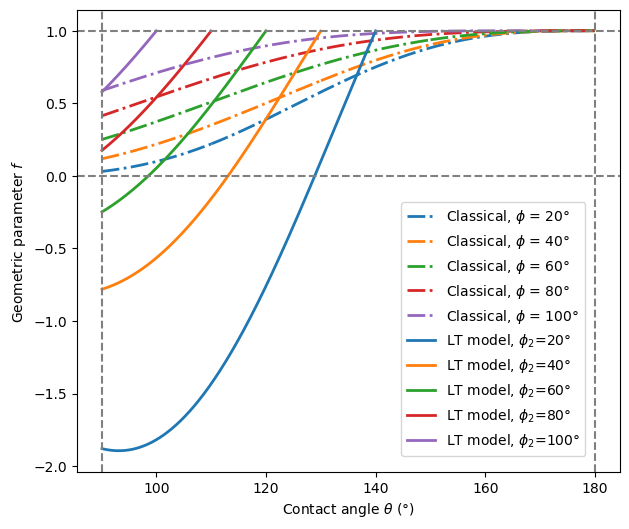

In [29]:
#FigS3c
import numpy as np
import matplotlib.pyplot as plt
import itertools


# Define the first free energy model
def free_energy_model1(x, x20):
    term1 = 0.5
    term2 = 0.25 * (-3 * np.sin(x + x20) + (np.sin(x + x20))**3 - (np.cos(x + x20))**3 * np.cos(x20) / np.sin(x20))
    return term1 + term2

# Define the second free energy model
def free_energy_model2(x, x20):
    term1 = 1.0
    term2 = -np.sin(x)**3 * np.cos(x20)
    return term1 + term2

# Flat surface model (used for both comparisons)
def free_energy_flat(x):
    return 0.5 + 0.25 * np.cos(x)**3 - 0.75 * np.cos(x)

# Angle in radians and degrees
phi = np.linspace(np.pi * 9/18, np.pi, 3140)
phi_degrees = np.degrees(phi)

# Define x20 values for both models
x20_values_model1 = np.linspace(np.pi * 2/18, np.pi * 10/18, 5)
x20_values_model2 = np.linspace(np.pi * 2/18, np.pi * 8/18, 4)

# --- Plotting starts ---
plt.figure(figsize=(7, 6))

# Get default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = itertools.cycle(default_colors)


# Plot model 1
for x20 in x20_values_model1:
    color = next(color_cycle)
    f1 = free_energy_model1(phi, x20)
    mask = (phi >= np.pi/2) & (phi <= np.pi/2 + x20)
    phi_f = phi[mask]
    f1_f = f1[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f1_f)
    plt.plot(phi_f_deg[:max_index+1], f1_f[:max_index+1], color=color, linestyle='-.',
             label=f"Classical, $\\phi$ = {np.degrees(x20):.0f}°", linewidth=2)

# Plot flat surface reference (commented out as in original)
# y_flat = free_energy_flat(phi)
# plt.plot(phi_degrees, y_flat, label='Flat surface', color='black', linestyle='--', linewidth=2)

# Plot model 2
for x20 in x20_values_model2:
    color = next(color_cycle)
    f2 = free_energy_model2(phi, x20)
    mask = (phi >= np.pi/2 + x20) & (phi <= np.pi)
    phi_f = phi[mask]
    f2_f = f2[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f2_f)
    plt.plot(phi_f_deg[:max_index+1], f2_f[:max_index+1], linestyle='-.', linewidth=2)


# Version 1 of free energy function
def free_energy_v1(x, x20, x1, x2, x10):
    term1 = 0.25 * (1.0 - np.sin(x1)) * (2 - np.cos(x) * (1 + np.sin(x1)) / np.sin(x10))
    term2 = 0.25 * (1.0 - np.sin(x2)) * (2 - np.cos(x) * (1 + np.sin(x2)) / np.sin(x20))
    return term1 + term2

# Version 2 of free energy function
def free_energy_v2(x, x20, x1, x2, x10):
    term1 = (3.0 / 4.0) * (4.0 - 2.0 * (np.sin(x1) + np.sin(x2))
             - (np.cos(x) * ((np.cos(x2))**2 - (np.cos(x1))**2) / np.sin(x20))
             + 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + ((np.cos(x2))**3 - (np.cos(x1))**3) / np.tan(x20))
    return term1 + term2

# Setup
phi = np.linspace(0.001, np.pi, 3140)
x10 = np.pi * 60 / 180  # 60 degrees
x20_values = np.linspace(np.pi * 2 / 18, np.pi * 10 / 18, 5)
phi_degrees = np.degrees(phi)


for idx, x20 in enumerate(x20_values):
    color1 = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]    
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20

    # Compute and filter
    v1 = free_energy_v1(phi, x20, x1_vals, x2_vals, x10)
    v2 = free_energy_v2(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi*9 / 18) & (phi <= np.pi-0.5*(x10+x20))
    
    phi_f = phi_degrees[mask]
    v1_f = v1[mask]
    v2_f = v2[mask]

    max_idx_v1 = np.argmax(v1_f)
    max_idx_v2 = np.argmax(v2_f)

    label_angle = f"$\\phi_2$={np.degrees(x20):.0f}°"
    #plt.plot(phi_f[:max_idx_v1 + 1], v1_f[:max_idx_v1 + 1], label=f"V1 {label_angle}", linewidth=2)
    plt.plot(phi_f[:max_idx_v2 + 1], v2_f[:max_idx_v2 + 1], '-', label=f"LT model, {label_angle}", linewidth=2, color=color1)


# Formatting
plt.xlabel('Contact angle $\\theta$ (°)')
plt.ylabel('Geometric parameter $f$')
plt.axhline(y=1.0, color='gray', linestyle='--')
plt.axhline(y=0.0, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.axvline(x=180, color='gray', linestyle='--')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.02))
plt.savefig('model1-2-lt-60.svg')
plt.show()


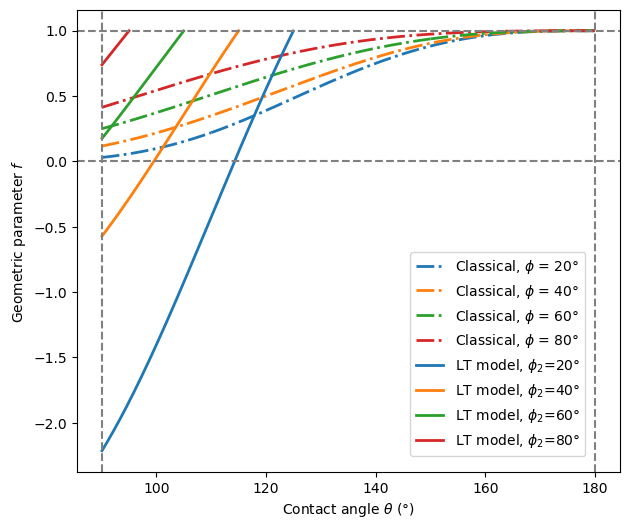

In [30]:
#FigS3d
import numpy as np
import matplotlib.pyplot as plt
import itertools


# Define the first free energy model
def free_energy_model1(x, x20):
    term1 = 0.5
    term2 = 0.25 * (-3 * np.sin(x + x20) + (np.sin(x + x20))**3 - (np.cos(x + x20))**3 * np.cos(x20) / np.sin(x20))
    return term1 + term2

# Define the second free energy model
def free_energy_model2(x, x20):
    term1 = 1.0
    term2 = -np.sin(x)**3 * np.cos(x20)
    return term1 + term2

# Flat surface model (used for both comparisons)
def free_energy_flat(x):
    return 0.5 + 0.25 * np.cos(x)**3 - 0.75 * np.cos(x)

# Angle in radians and degrees
phi = np.linspace(np.pi * 9/18, np.pi, 3140)
phi_degrees = np.degrees(phi)

# Define x20 values for both models
x20_values_model1 = np.linspace(np.pi * 2/18, np.pi * 8/18, 4)
x20_values_model2 = np.linspace(np.pi * 2/18, np.pi * 8/18, 4)

# --- Plotting starts ---
plt.figure(figsize=(7, 6))

# Get default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = itertools.cycle(default_colors)  # allows looping over it


# Plot model 1
for x20 in x20_values_model1:
    color = next(color_cycle)
    f1 = free_energy_model1(phi, x20)
    mask = (phi >= np.pi/2) & (phi <= np.pi/2 + x20)
    phi_f = phi[mask]
    f1_f = f1[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f1_f)
    plt.plot(phi_f_deg[:max_index+1], f1_f[:max_index+1], color=color, linestyle='-.',
             label=f"Classical, $\\phi$ = {np.degrees(x20):.0f}°", linewidth=2)

# Plot flat surface reference (commented as original)
# y_flat = free_energy_flat(phi)
# plt.plot(phi_degrees, y_flat, label='Flat surface', color='black', linestyle='--', linewidth=2)

# Plot model 2
for x20 in x20_values_model2:
    color = next(color_cycle)
    f2 = free_energy_model2(phi, x20)
    mask = (phi >= np.pi/2 + x20) & (phi <= np.pi)
    phi_f = phi[mask]
    f2_f = f2[mask]
    phi_f_deg = np.degrees(phi_f)
    max_index = np.argmax(f2_f)
    plt.plot(phi_f_deg[:max_index+1], f2_f[:max_index+1], linestyle='-.', linewidth=2)


# Version 1 of free energy function
def free_energy_v1(x, x20, x1, x2, x10):
    term1 = 0.25 * (1.0 - np.sin(x1)) * (2 - np.cos(x) * (1 + np.sin(x1)) / np.sin(x10))
    term2 = 0.25 * (1.0 - np.sin(x2)) * (2 - np.cos(x) * (1 + np.sin(x2)) / np.sin(x20))
    return term1 + term2

# Version 2 of free energy function
def free_energy_v2(x, x20, x1, x2, x10):
    term1 = (3.0 / 4.0) * (4.0 - 2.0 * (np.sin(x1) + np.sin(x2))
             - (np.cos(x) * ((np.cos(x2))**2 - (np.cos(x1))**2) / np.sin(x20))
             + 2 * np.cos(x1)**2 / np.sin(x20) * (np.cos(x + x10 + x20) - np.cos(x)))
    term2 = -0.5 * ((2 + np.sin(x1)) * (1 - np.sin(x1))**2
             + (2 + np.sin(x2)) * (1 - np.sin(x2))**2
             + ((np.cos(x2))**3 - (np.cos(x1))**3) / np.tan(x20))
    return term1 + term2

# Setup
phi = np.linspace(0.001, np.pi, 3140)
x10 = np.pi * 90 / 180  # 90 degrees
x20_values = np.linspace(np.pi * 2 / 18, np.pi * 8 / 18, 4)
phi_degrees = np.degrees(phi)


for idx, x20 in enumerate(x20_values):
    color1 = plt.rcParams['axes.prop_cycle'].by_key()['color'][idx]    
    x1_vals = np.pi - phi - x10
    x2_vals = np.pi - phi - x20

    # Compute and filter
    v1 = free_energy_v1(phi, x20, x1_vals, x2_vals, x10)
    v2 = free_energy_v2(phi, x20, x1_vals, x2_vals, x10)
    mask = (phi >= np.pi*9 / 18) & (phi <= np.pi-0.5*(x10+x20))
    
    phi_f = phi_degrees[mask]
    v1_f = v1[mask]
    v2_f = v2[mask]

    max_idx_v1 = np.argmax(v1_f)
    max_idx_v2 = np.argmax(v2_f)

    label_angle = f"$\\phi_2$={np.degrees(x20):.0f}°"
    #plt.plot(phi_f[:max_idx_v1 + 1], v1_f[:max_idx_v1 + 1], label=f"V1 {label_angle}", linewidth=2)
    plt.plot(phi_f[:max_idx_v2 + 1], v2_f[:max_idx_v2 + 1], '-', label=f"LT model, {label_angle}", linewidth=2, color=color1)



# Formatting
plt.xlabel('Contact angle $\\theta$ (°)')
plt.ylabel('Geometric parameter $f$')
plt.axhline(y=1.0, color='gray', linestyle='--')
plt.axhline(y=0.0, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.axvline(x=180, color='gray', linestyle='--')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.02))
plt.savefig('model1-2-lt-90.svg')
plt.show()
